# The Sunyaev-Zeldovich signal for a single pointing

Now having the scattering kernel for a population of electrons, we can simulate the SZ signal along a single line-of-sight. For this, we convolve the background intensity from the CMB with the scattering kernel. The convolution happens over $s$.

We first show the spectral distortion arising from a thermal Maxwellian electron population. Note that we also generate the CMBR because we want to plot specifically the SZ distortion. `MockSZ` generates the distortion of the cluster on top of the CMB, so to get the total intensity (including CMB), one has to add this on top.

We also plot the kinematic SZ effect, arising from peculiar motion of the cluster with respect to the Hubble flow.

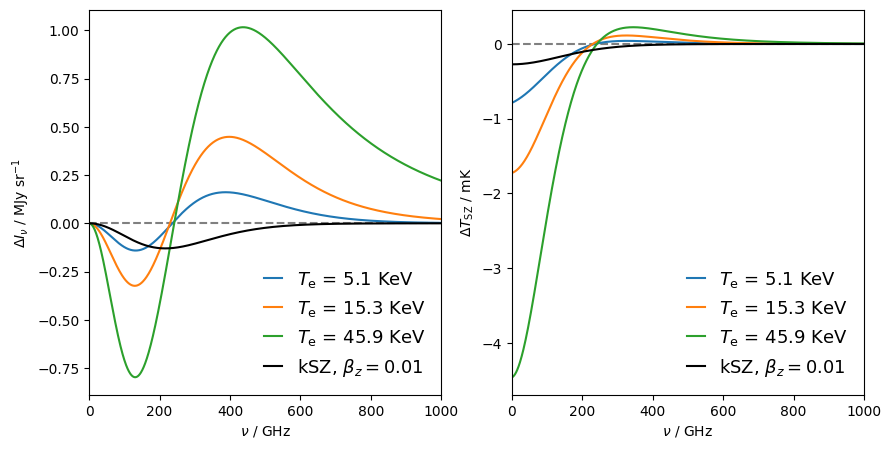

In [8]:
#%matplotlib notebook

import matplotlib

import numpy as np
import matplotlib.pyplot as pt

import MockSZ.SinglePointing as MSPointing
import MockSZ.Conversions as MConv



eV_arr = np.array([5.1, 15.3, 45.9]) * 1e3

Te = MConv.eV_Temp(eV_arr)
tau_e = 0.01
num_arr = 1000
nu = np.linspace(1, 1000, num=num_arr) * 1e9
nu_plot = nu * 1e-9

beta_z = 0.01

fig, ax = pt.subplots(1,2, figsize=(10, 5))
for i in range(3):
    SZ = MSPointing.getSpecIntensityRM(nu, Te[i], tau_e)
    SZ_MJy = MConv.SI_JySr(SZ) * 1e-6
    SZ_mK = MConv.SI_Temp(SZ, nu) * 1e3
    
    label = r"$T_\mathrm{e}$" + f" = {eV_arr[i] * 1e-3:.1f} KeV"
    
    ax[0].plot(nu_plot, SZ_MJy, label=label)
    ax[1].plot(nu_plot, SZ_mK, label=label)

kSZ = MSPointing.getSpecIntensityKSZ(nu, beta_z, tau_e)
kSZ_MJy = MConv.SI_JySr(kSZ * 1e-6)
kSZ_mK = MConv.SI_Temp(kSZ * 1e3, nu)

label = r"kSZ, $\beta_z={:.2f}$".format(beta_z)
    
ax[0].plot(nu_plot, kSZ_MJy, color="black", label=label)
ax[1].plot(nu_plot, kSZ_mK, color="black", label=label)

ax[0].axhline(y=0, zorder=0, color="grey", ls="dashed")
ax[0].set_xlim(0, 1000)

ax[0].set_ylabel(r"$\Delta I_\nu$ / MJy sr$^{-1}$")
ax[0].set_xlabel(r"$\nu$ / GHz")

ax[0].legend(frameon=False, prop={'size': 13},handlelength=1)

ax[1].axhline(y=0, zorder=0, color="grey", ls="dashed")
ax[1].set_xlim(0, 1000)

ax[1].set_ylabel(r"$\Delta T_\mathrm{SZ}$ / mK")
ax[1].set_xlabel(r"$\nu$ / GHz")
ax[1].legend(frameon=False, prop={'size': 13},handlelength=1)

pt.show()

We plot the SZ signal for three different $T_\mathrm{e}$. For each $T_\mathrm{e}$, we plot the signal with $\tau_\mathrm{e}=1$ as solid lines. In addition to the intensity in MJy per steradian, we also give the brightness temperature difference $\Delta T_\mathrm{SZ}$.

Note that sometimes, authors plot the intensities normalised by the Compton-$y$ factor. Since these are equivalent to dividing by $T_\mathrm{e}$, the relatove shapes change. `MockSZ` does not do this: the intensities are as-is.

It is evident that the general relativistic treatment we followed deviates from the conventional approach, which involves the Kompaneets equation. For example, in the Kompaneets equation, the null around $\nu \approx 218$ GHz is independent of $T_\mathrm{e}$. For our case, this does seem to be the case. The Kompaneets equation is derived by solving a non-relativistic diffusion equation and therefore not that accurate for hot gases. That is why, for increasing $T_\mathrm{e}$, our solution deviates increasingly from the Kompaneets solution.

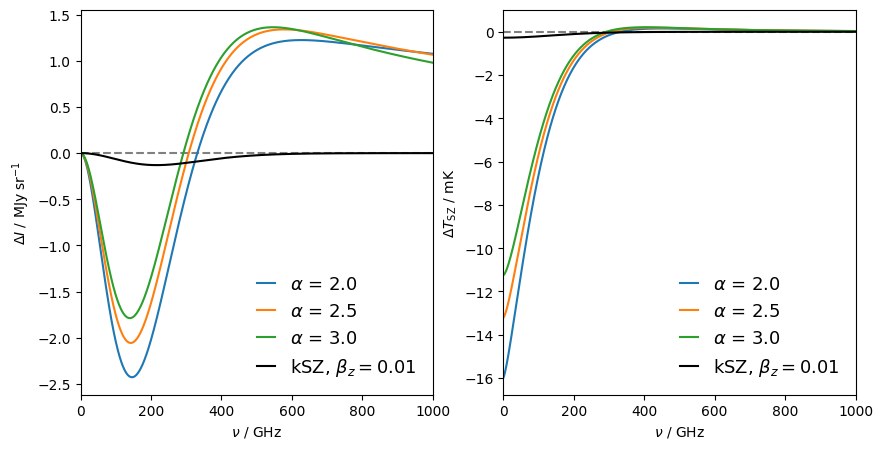

In [3]:
alpha = np.array([2, 2.5, 3])

fig, ax = pt.subplots(1,2, figsize=(10, 5))
for i in range(3):
    SZ = MSPointing.getSpecIntensityPL(nu, alpha[i], tau_e)
    SZ_MJy = MConv.SI_JySr(SZ) * 1e-6
    SZ_mK = MConv.SI_Temp(SZ, nu) * 1e3
    
    label = r"$\alpha$" + f" = {alpha[i]:.1f}"
    
    ax[0].plot(nu_plot, SZ_MJy, label=label)
    ax[1].plot(nu_plot, SZ_mK, label=label)

kSZ = MSPointing.getSpecIntensityKSZ(nu, beta_z, tau_e)
kSZ_MJy = MConv.SI_JySr(kSZ * 1e-6)
kSZ_mK = MConv.SI_Temp(kSZ * 1e3, nu)

label = r"kSZ, $\beta_z={:.2f}$".format(beta_z)
    
ax[0].plot(nu_plot, kSZ_MJy, color="black", label=label)
ax[1].plot(nu_plot, kSZ_mK, color="black", label=label)
    
ax[0].axhline(y=0, zorder=0, color="grey", ls="dashed")
ax[0].set_xlim(0, 1000)

ax[0].set_ylabel(r"$\Delta I_\nu$ / MJy sr$^{-1}$")
ax[0].set_xlabel(r"$\nu$ / GHz")

ax[0].legend(frameon=False, prop={'size': 13},handlelength=1)

ax[1].axhline(y=0, zorder=0, color="grey", ls="dashed")
ax[1].set_xlim(0, 1000)

ax[1].set_ylabel(r"$\Delta T_\mathrm{SZ}$ / mK")
ax[1].set_xlabel(r"$\nu$ / GHz")
ax[1].legend(frameon=False, prop={'size': 13},handlelength=1)

pt.show()

We also plot the single-pointing curves for the powerlaw distribution of electrons. It is clearly visible that, due to the enhanced upshifting tail of the powerlaw scattering kernel, the high energy tail is a lot longer. Also, the dip before 218 GHz is significantly deeper. 